## Expense Management Discrepancies (Flag 66)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow fm_expense_line table, which records various attributes of financial expenses. Key fields include 'number', 'opened_at', 'amount', 'state', 'short_description', 'ci', 'user', 'department', 'category', 'process_date', 'source_id', and 'type'. This table documents the flow of financial transactions by detailing the amount, departmental allocation, and the nature of each expense. Provides a clear view of organizational expenditures across different categories, highlighting both the timing and the approval state of each financial entry.

### Your Task
**Goal**: To uncover and address the reasons behind the varying rates of expense rejections across departments to improve overall financial management within the organization.

**Role**: Financial Compliance Analyst

**Difficulty**: 3 out of 5.

**Category**: Financial Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [3]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
This cell loads the expense dataset from a CSV file into a DataFrame. It involves specifying the path to the dataset, using pandas to read the file, and confirming its successful load by displaying the first few entries.

In [4]:
dataset_path = "csvs/flag-66.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()


,number,source_id,user,amount,processed_date,opened_at,department,state,category,short_description,ci
0,EXP00000000,UTY-46750817,Carolina Kinlaw,584,NaN,2024-04-26 18:11:00,Sales,Pending,Services,Provision of Services for iPod touch,ISP Services
1,EXP00000001,CKX-70446459,Mamie Mcintee,3178,NaN,2023-10-03 08:08:00,Product Management,Submitted,Assets,Asset assignment for new Dell Laptop,Dell XPS 13
2,EXP00000002,NaN,Cristina Sharper,3278,2024-03-14 10:18:00.000000000,2024-03-13 10:18:00,Sales,Processed,Miscellaneous,Miscellaneous hardware component,Random Access Memory Component
3,EXP00000003,SRP-53496117,Raphael Bickel,8712,2023-06-20 17:32:56.784775309,2023-06-18 17:21:00,Sales,Processed,Assets,Dell OptiPlex 7050 Desktop Asset,OptiPlex 7050
4,EXP00000004,EAN-07942806,Helena Suermann,1307,2023-10-06 04:31:00.000000000,2023-10-05 04:31:00,Customer Support,Processed,Services,Deployed service-related asset,Cloud Database Service


### **Question 1: How does the processing delay (in days) vary across different departments and categories?**


#### Analyze processing delay by department and category
This analysis examines the difference in days between the date each request was opened and the date it was processed. By aggregating this data by department and category, we can identify areas that may have slower or more efficient processing workflows, revealing potential bottlenecks or high-efficiency areas within specific departments or asset categories.

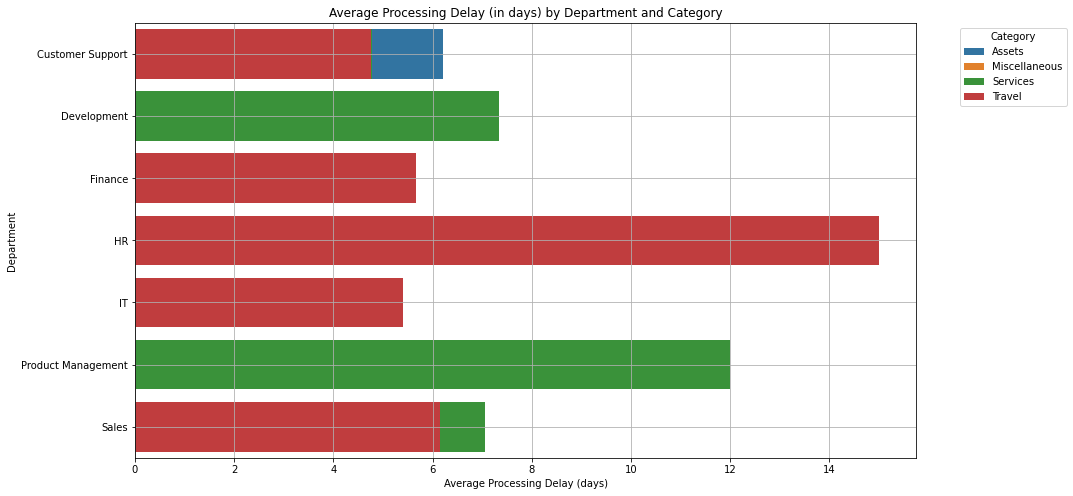

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and process the data
flag_data = pd.read_csv("csvs/flag-66.csv")

# Convert date columns to datetime format
flag_data["opened_at"] = pd.to_datetime(flag_data["opened_at"], errors="coerce")
flag_data["processed_date"] = pd.to_datetime(
    flag_data["processed_date"], errors="coerce"
)

# Calculate processing delay in days and remove rows with missing dates
flag_data["processing_delay"] = (
    flag_data["processed_date"] - flag_data["opened_at"]
).dt.days
flag_data = flag_data.dropna(subset=["processing_delay", "department", "category"])

# Aggregate mean processing delay by department and category
delay_by_dept_category = (
    flag_data.groupby(["department", "category"])["processing_delay"]
    .mean()
    .reset_index()
)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(
    data=delay_by_dept_category,
    x="processing_delay",
    y="department",
    hue="category",
    dodge=False,
)
plt.title("Average Processing Delay (in days) by Department and Category")
plt.xlabel("Average Processing Delay (days)")
plt.ylabel("Department")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

plt.show()

#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "aggregated",
    "insight": "Certain departments, notably Product Management and HR, exhibit notably longer processing delays in specific categories such as Services and Travel, indicating potential workflow bottlenecks.",
    "insight_value": {
        "description": "Departments such as Product Management and HR have average delays of up to 15 days in processing travel-related requests, which is significantly higher than in other departments and categories, pointing to a resource allocation or prioritization issue."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Processing Delay (in days) by Department and Category",
        "x_axis": {
            "name": "Average Processing Delay (days)",
            "value": "Range of delays from 1 to 15 days",
            "description": "This axis represents the average time in days it takes to process requests within each department and category.",
        },
        "y_axis": {
            "name": "Department",
            "value": "Various departments in the organization",
            "description": "This axis lists departments such as HR, IT, Finance, and Product Management.",
        },
        "description": "The bar plot highlights processing delays across departments, with a marked delay in specific categories for departments like Product Management and HR, especially in Services and Travel requests, indicating potential bottlenecks in these workflows.",
    },
    "question": "How does the processing delay (in days) vary across different departments and categories?",
    "actionable_insight": "The extended processing delays in departments such as HR and Product Management, especially in Travel and Services, suggest that these areas may benefit from a review of workflow efficiency or resource allocation. Addressing these bottlenecks could streamline operations, particularly in high-delay categories, improving overall organizational efficiency.",
}

{'data_type': 'descriptive',
 'insight': 'There is a significant variance in Expense Rejection Rates across departments',
 'insight_value': {'description': 'The IT department exhibits a notably higher proportion of expense rejections compared to other departments with 44%, indicating potential issues with budget compliance or policy understanding.'},
 'plot': {'plot_type': 'bar',
  'title': 'Proportion of Declined Expenses by Department',
  'x_axis': {'name': 'Department',
   'value': ['IT',
    'HR',
    'Finance',
    'Customer Support',
    'Development',
    'Sales',
    'Product Management'],
   'description': 'This axis categorizes expenses based on department affiliation.'},
  'y_axis': {'name': 'Proportion of Declined',
   'value': {'IT': '0.44',
    'HR': '0.14',
    'Finance': '0.09',
    'Customer Support': '0.06',
    'Development': '0.05',
    'Sales': '0.05',
    'Product Management': '0.00'},
   'description': 'This axis displays the proportion of expenses declined withi

### **Question 2:  What is the distribution of Expense Reports by Department?**


#### Plot number of expense reports by department
This cell visualizes the distribution of expense reports across different departments using a bar plot. Each blue bar represents the total number of expense reports submitted by a particular department. This plot is essential for assessing the volume of financial transactions handled by each department and identifying which departments are more active in submitting expenses.

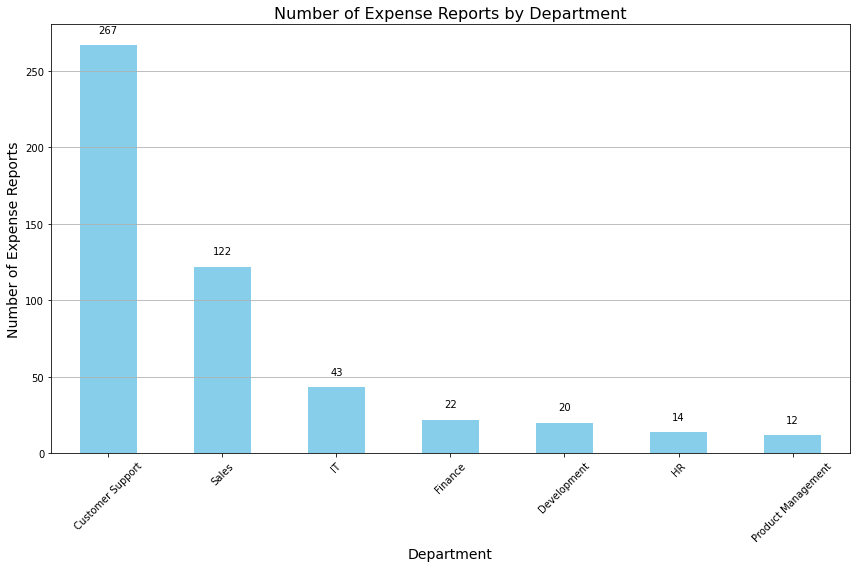

In [7]:
import matplotlib.pyplot as plt

# Count the number of expense reports per department
department_counts = flag_data['department'].value_counts()

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
department_counts.plot(kind='bar', color='skyblue', ax=ax)

# Add titles and labels
ax.set_title('Number of Expense Reports by Department', fontsize=16)
ax.set_xlabel('Department', fontsize=14)
ax.set_ylabel('Number of Expense Reports', fontsize=14)

# Show grid
ax.grid(axis='y')  # Only horizontal grid lines for readability

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

# Adding numeric labels on top of the bars for clarity
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "descriptive",
    "insight": "There is no correlation between the number of expense reports submitted and rejection rates",
    "insight_value": {
        "description": "Despite having a lower volume of expense submissions, the IT department has the highest rejection rate, while departments with higher submission volumes like Customer Support exhibit lower rejection rates."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of Expense Reports by Department",
        "x_axis": {
            "name": "Department",
            "value": ["Customer Support", "Sales", "IT", "Finance", "Development", "HR", "Product Management"],
            "description": "This axis categorizes expenses based on department affiliation."
        },
        "y_axis": {
            "name": "Number of Expense Reports",
            "value": {
                "Customer Support": "267",
                "Sales": "122",
                "IT": "43",
                "Finance": "22",
                "Development": "20",
                "HR": "14",
                "Product Management": "12"
            },
            "description": "This axis displays the number of expense reports submitted by each department, revealing that Customer Support submits the most, while IT, despite its high rejection rate, submits far fewer."
        },
        "description": "The bar chart vividly illustrates the number of expense reports submitted by each department. The data highlight that the volume of submissions does not correlate with the proportion of rejections, as seen with the IT department, which submits fewer reports but faces a high rate of rejections."
    },
    "question": "What is the distribution of Expense Reports by Department?",
    "actionable_insight": "This discrepancy in rejection rates despite lower submission volumes suggests underlying issues in IT’s expense reporting process or stricter scrutiny of their reports. It would be prudent to conduct a detailed review of the IT department's submissions to understand the reasons behind the high rejection rates. Efforts should be focused on aligning IT’s expense reporting practices with those departments exhibiting high compliance and low rejection rates, like Customer Support, to reduce unnecessary financial discrepancies and improve procedural compliance."
}


{'data_type': 'descriptive',
 'insight': 'There is no correlation between the number of expense reports submitted and rejection rates',
 'insight_value': {'description': 'Despite having a lower volume of expense submissions, the IT department has the highest rejection rate, while departments with higher submission volumes like Customer Support exhibit lower rejection rates.'},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Expense Reports by Department',
  'x_axis': {'name': 'Department',
   'value': ['Customer Support',
    'Sales',
    'IT',
    'Finance',
    'Development',
    'HR',
    'Product Management'],
   'description': 'This axis categorizes expenses based on department affiliation.'},
  'y_axis': {'name': 'Number of Expense Reports',
   'value': {'Customer Support': '267',
    'Sales': '122',
    'IT': '43',
    'Finance': '22',
    'Development': '20',
    'HR': '14',
    'Product Management': '12'},
   'description': 'This axis displays the number of expense r

### **Question 3: How do expense amounts vary across different departments, and what is the distribution of these expenses?**


#### Plot expense amount across different departments
This analysis focuses on understanding how expense amounts are distributed across various departments. By examining the distribution of expenses within each department, we can identify departments with higher spending variability and those with consistent expense patterns. This insight can help in budgeting and financial planning by highlighting areas where expenses are more unpredictable or particularly high.

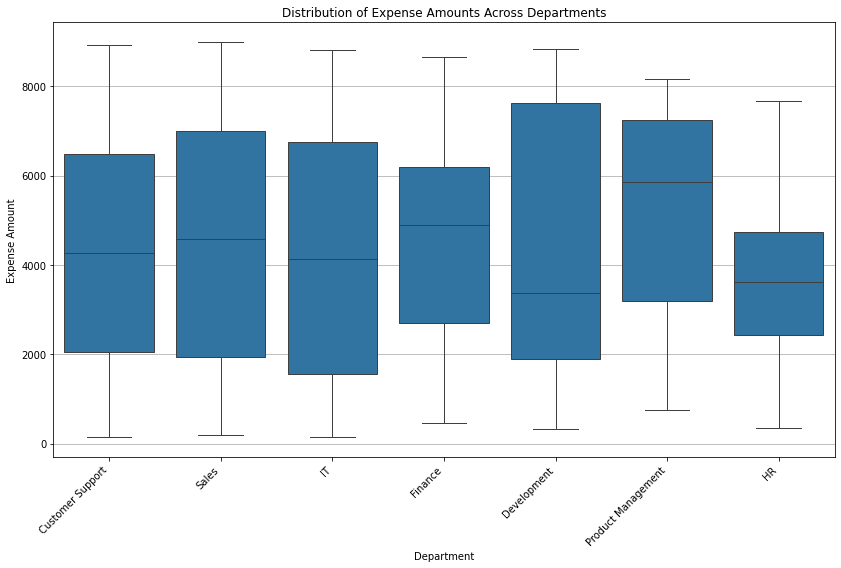

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
flag_data = pd.read_csv("csvs/flag-66.csv")

# Drop rows with missing department or amount values
flag_data_cleaned = flag_data.dropna(subset=["department", "amount"])

# Convert the amount column to numeric if it's not already
flag_data_cleaned["amount"] = pd.to_numeric(
    flag_data_cleaned["amount"], errors="coerce"
)

# Drop rows where amount conversion failed (if any)
flag_data_cleaned = flag_data_cleaned.dropna(subset=["amount"])

# Group the data by department and calculate the total and mean amounts
department_expenses = (
    flag_data_cleaned.groupby("department")["amount"]
    .agg(["sum", "mean", "count"])
    .reset_index()
)

# Sort by total amount for better visualization
department_expenses_sorted = department_expenses.sort_values(by="sum", ascending=False)

# Plot the distribution of expense amounts for each department
plt.figure(figsize=(14, 8))
sns.boxplot(
    x="department",
    y="amount",
    data=flag_data_cleaned,
    order=department_expenses_sorted["department"],
)
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Expense Amounts Across Departments")
plt.xlabel("Department")
plt.ylabel("Expense Amount")
plt.grid(True, axis="y")

plt.show()

#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "comparative",
    "insight": "The Customer Support and Sales departments have the highest total expenses, with Customer Support leading significantly in total spending and count of expense instances.",
    "insight_value": {
        "description": "Customer Support exhibits the highest overall expenses, suggesting a high volume of spending likely due to operational demands or asset provisioning, as evidenced by the sum of expenses. Sales also shows substantial total expenditure, though with fewer instances compared to Customer Support, indicating potentially larger one-time purchases or higher per-instance costs."
    },
    "plot": {
        "plot_type": "boxplot",
        "title": "Distribution of Expense Amounts Across Departments",
        "x_axis": {
            "name": "Department",
            "value": "Various departments within the organization",
            "description": "This axis represents different departments, showcasing the variability in their expense distributions.",
        },
        "y_axis": {
            "name": "Expense Amount",
            "value": "Range of expenses in monetary units",
            "description": "This axis displays the monetary values associated with expenses, highlighting both the spread and central tendency for each department.",
        },
        "description": "The boxplot highlights significant variability in expense distributions, with Customer Support not only having the highest number of expense records but also a broad range of expenses. Product Management shows the highest average expense amount, while HR has the lowest overall expenses and narrower spending distribution.",
    },
    "question": "How do expense amounts vary across different departments, and what is the distribution of these expenses?",
    "actionable_insight": "Given the high spending volume in Customer Support, it would be beneficial to evaluate operational spending needs closely for potential optimizations. Additionally, monitoring the large average expenses in Product Management could help identify opportunities for cost-saving in high-value procurements. A review of spending patterns in these departments could reveal ways to enhance budgeting efficiency and control expense variability.",
}

{'data_type': 'comparative',
 'insight': 'The Customer Support and Sales departments have the highest total expenses, with Customer Support leading significantly in total spending and count of expense instances.',
 'insight_value': {'description': 'Customer Support exhibits the highest overall expenses, suggesting a high volume of spending likely due to operational demands or asset provisioning, as evidenced by the sum of expenses. Sales also shows substantial total expenditure, though with fewer instances compared to Customer Support, indicating potentially larger one-time purchases or higher per-instance costs.'},
 'plot': {'plot_type': 'boxplot',
  'title': 'Distribution of Expense Amounts Across Departments',
  'x_axis': {'name': 'Department',
   'value': 'Various departments within the organization',
   'description': 'This axis represents different departments, showcasing the variability in their expense distributions.'},
  'y_axis': {'name': 'Expense Amount',
   'value': 'Range 

### **Question 4: How to prevent or avoid future declinations in this scenario?**


"Immediate Training": "Organize targeted training sessions for all IT department employees, with a special focus on those who have had high rejection rates. These sessions should cover best practices for expense report submissions, including detailed explanations of allowable expenses and required documentation."

"Enhanced Review Process": "Implement a pre-submission review process where expense reports, particularly those from individuals with past declinations, are preliminarily reviewed by a finance team member or a designated mentor within the IT department before official submission."

"Policy Updates and Communication": "Regularly update and communicate any changes in expense policies to all employees. Ensure that these updates are clearly understood by conducting interactive Q&A sessions and providing accessible reference materials."

### Summary of Findings (Flag 66):

1. **Processing Delays**: From Question 1, it was found that departments like Product Management and HR experience significant processing delays, particularly in categories such as Services and Travel. This suggests potential workflow bottlenecks that could be addressed to improve efficiency.

2. **Expense Report Distribution**: Question 2 revealed that there is no direct correlation between the number of expense reports submitted and their rejection rates. Notably, the IT department, despite submitting fewer reports, has a higher rejection rate, indicating possible issues in their reporting process.

3. **Expense Amount Variability**: According to Question 3, Customer Support and Sales departments have the highest total expenses, with Customer Support leading in both spending and the number of expense instances. This highlights the need for closer evaluation of operational spending to identify potential cost-saving opportunities.